<center><h1>Hemnani_Hitika_HW4</h1></center>
<br>
<br>

Name: Hitika Hemnani
<br>
Github Username: hhemnani
<br>
USC ID: 8304678802

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
import pandas as pd
import numpy as np
import os

Get the AReM Data Set

In [2]:
ARem_data = "../data/AReM"

### (b) Splitting Data

In [3]:
##From HW3

training_data = []
testing_data = []

## looping through all the directories in the AReM Dataset
for activity in os.listdir(ARem_data):
    activity_path = os.path.join(ARem_data, activity)
    
    # For the images -->skip
    if not os.path.isdir(activity_path):
        continue
        
    # again looping through all the dataset files this time
    for file in os.listdir(activity_path):
        if file.endswith('.csv'):
            file_path = os.path.join(activity_path, file)
            
            ##Extracting File Numbers to split
            dataset_number = int(file.replace('dataset', '').replace('.csv', ''))

            ##Splitting the data
            if activity in ['bending1', 'bending2']:
                if dataset_number <= 2:
                    testing_data.append((file_path, activity))
                else:
                    training_data.append((file_path, activity))
            else:
                if dataset_number <= 3:
                    testing_data.append((file_path, activity))
                else:
                    training_data.append((file_path, activity))

In [4]:
#training_data  

### (c) Feature Extraction

In [5]:
##Feature Extraction function to extract time-domain features

def extracting_time_features(time_data):
    # minimum=np.min(time_data)
    # maximum=np.max(time_data)
    # mean=np.mean(time_data)
    # median=np.median(time_data)
    # STD=np.std(time_data)
    # Q1 = np.percentile(time_data, 25)
    # Q3 = np.percentile(time_data, 75)

    # return [minimum,maximum,mean,median,STD,Q1,Q3]
    ##this idea is not used much simpler to just add values directly to columns
    
    features = {}
    
    ###Here I was considering all the columns I was getting the wrong output as the time column was also considered 
    ##Hence skipping 1st column
    for i, column in enumerate(time_data.columns[1:], start=1):
        
        ##Error Handeling->type error occured
        series = pd.to_numeric(time_data[column], errors='coerce')
        series = series.dropna()
        if series.empty:
            continue
        
        features.update({
            f'min{i}': np.min(series),
            f'max{i}': np.max(series),
            f'mean{i}': np.mean(series),
            f'median{i}': np.median(series),
            f'std{i}': np.std(series),
            f'1st_quart{i}': np.percentile(series, 25),
            f'3rd_quart{i}': np.percentile(series, 75)
        })
    
    return features


In [6]:
training_df=[]
testing_df=[]

##looping to get all the datasets
for path, activity in training_data:
    time_data=pd.read_csv(path, sep=',', skiprows=4, on_bad_lines='skip')
    # print(time_data)
    features = extracting_time_features(time_data)
    features['activity'] = activity
    training_df.append(features)

##Same for testing data
for path, activity in testing_data:
    time_data = pd.read_csv(path, sep=',', skiprows=4, on_bad_lines='skip')
    features = extracting_time_features(time_data)
    features['activity'] = activity
    testing_df.append(features)

In [7]:
# Convert lists to DataFrames
training_df = pd.DataFrame(training_df)
testing_df = pd.DataFrame(testing_df)
new_dataset = pd.concat([training_df, testing_df], ignore_index=True)

# Adding 'Instance' column to match the assignment requirements
new_dataset.insert(0, 'Instance', range(1, len(new_dataset) + 1))
new_dataset.drop(columns=['activity'], inplace=True)##for output

In [8]:
#training_df

In [9]:
activity_dataset=pd.concat([training_df, testing_df], ignore_index=True)

activity_dataset.insert(0, 'Instance', range(1, len(new_dataset) + 1))

Selecting Features three most important time-domain features:
Mean, STD , Max

In [10]:
selected_features = ['std1','mean1','max1','std2','mean2','max2','std3','mean3','max3','std4','mean4','max4','std5','mean5','max5','std6','mean6','max6']

In [11]:
selected_dataframe = training_df[selected_features + ['activity']]
selected_dataframe

std1      mean1   max1      std2     mean2   max2      std3  \
0   1.557210  43.954500  47.40  0.338337  0.426250   1.70  3.027784   
1   3.666840  42.179812  47.75  0.630203  0.696042   3.00  3.806498   
2   2.241152  41.678063  45.75  0.405046  0.535979   2.83  4.082847   
3   1.384653  43.454958  48.00  0.315237  0.378083   1.58  3.843628   
4   1.616677  43.969125  48.00  0.262837  0.413125   1.50  3.738520   
..       ...        ...    ...       ...       ...    ...       ...   
64  4.737266  34.763333  46.25  2.275630  4.223792  12.68  2.917784   
65  4.641102  34.935812  51.00  2.332809  4.115750  12.21  2.897226   
66  4.943612  34.333042  47.67  2.566003  4.396958  12.48  2.964648   
67  4.726858  34.599875  45.75  2.535875  4.398833  15.37  3.033581   
68  4.437168  34.225875  43.67  2.516365  4.354500  17.24  2.809343   

        mean3   max3      std4     mean4   max4      std5      mean5   max5  \
0   22.122354  29.75  0.550083  0.497312   4.44  1.997520  35.588458  38.50   
1   22.183625  30.00  0.952736  0.989917   5.15  3.845436  33.493917  38.67   
2   19.006563  28.25  0.927833  0.841875   6.42  2.408514  29.857083  37.50   
3   15.793333  27.00  0.994724  0.849354  10.03  2.486268  23.034792  33.50   
4   15.868021  26.33  0.788162  0.666354   5.17  3.314843  22.103750  30.75   
..        ...    ...       ...       ...    ...       ...        ...    ...   
64  15.239021  23.75  1.588814  3.207062   9.20  3.171372  16.299563  25.50   
65  15.524521  23.33  1.501879  3.092792   9.09  3.188731  15.997229  25.00   
66  15.562896  23.33  1.674524  3.198313   9.01  2.997366  15.864437  24.00   
67  15.173667  24.00  1.589688  3.145500   9.18  2.902659  16.055563  23.25   
68  15.606479  23.00  1.728989  3.365375   9.20  2.989801  16.148000  24.00   

        std6     mean6   max6  activity  
0   0.512971  0.493292   1.79  bending1  
1   0.523771  0.613521   2.18  bending1  
2   0.388759  0.383292   1.79  bending1  
3   0.621885  0.679646   5.26  bending1  
4   0.487318  0.555312   2.96  bending1  
..       ...       ...    ...       ...  
64  1.645811  3.288271   9.39   walking  
65  1.699145  3.280021  10.21   walking  
66  1.615604  3.261583   8.01   walking  
67  1.678418  3.289542   8.86   walking  
68  1.759311  3.479542   9.42   walking  

[69 rows x 19 columns]

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

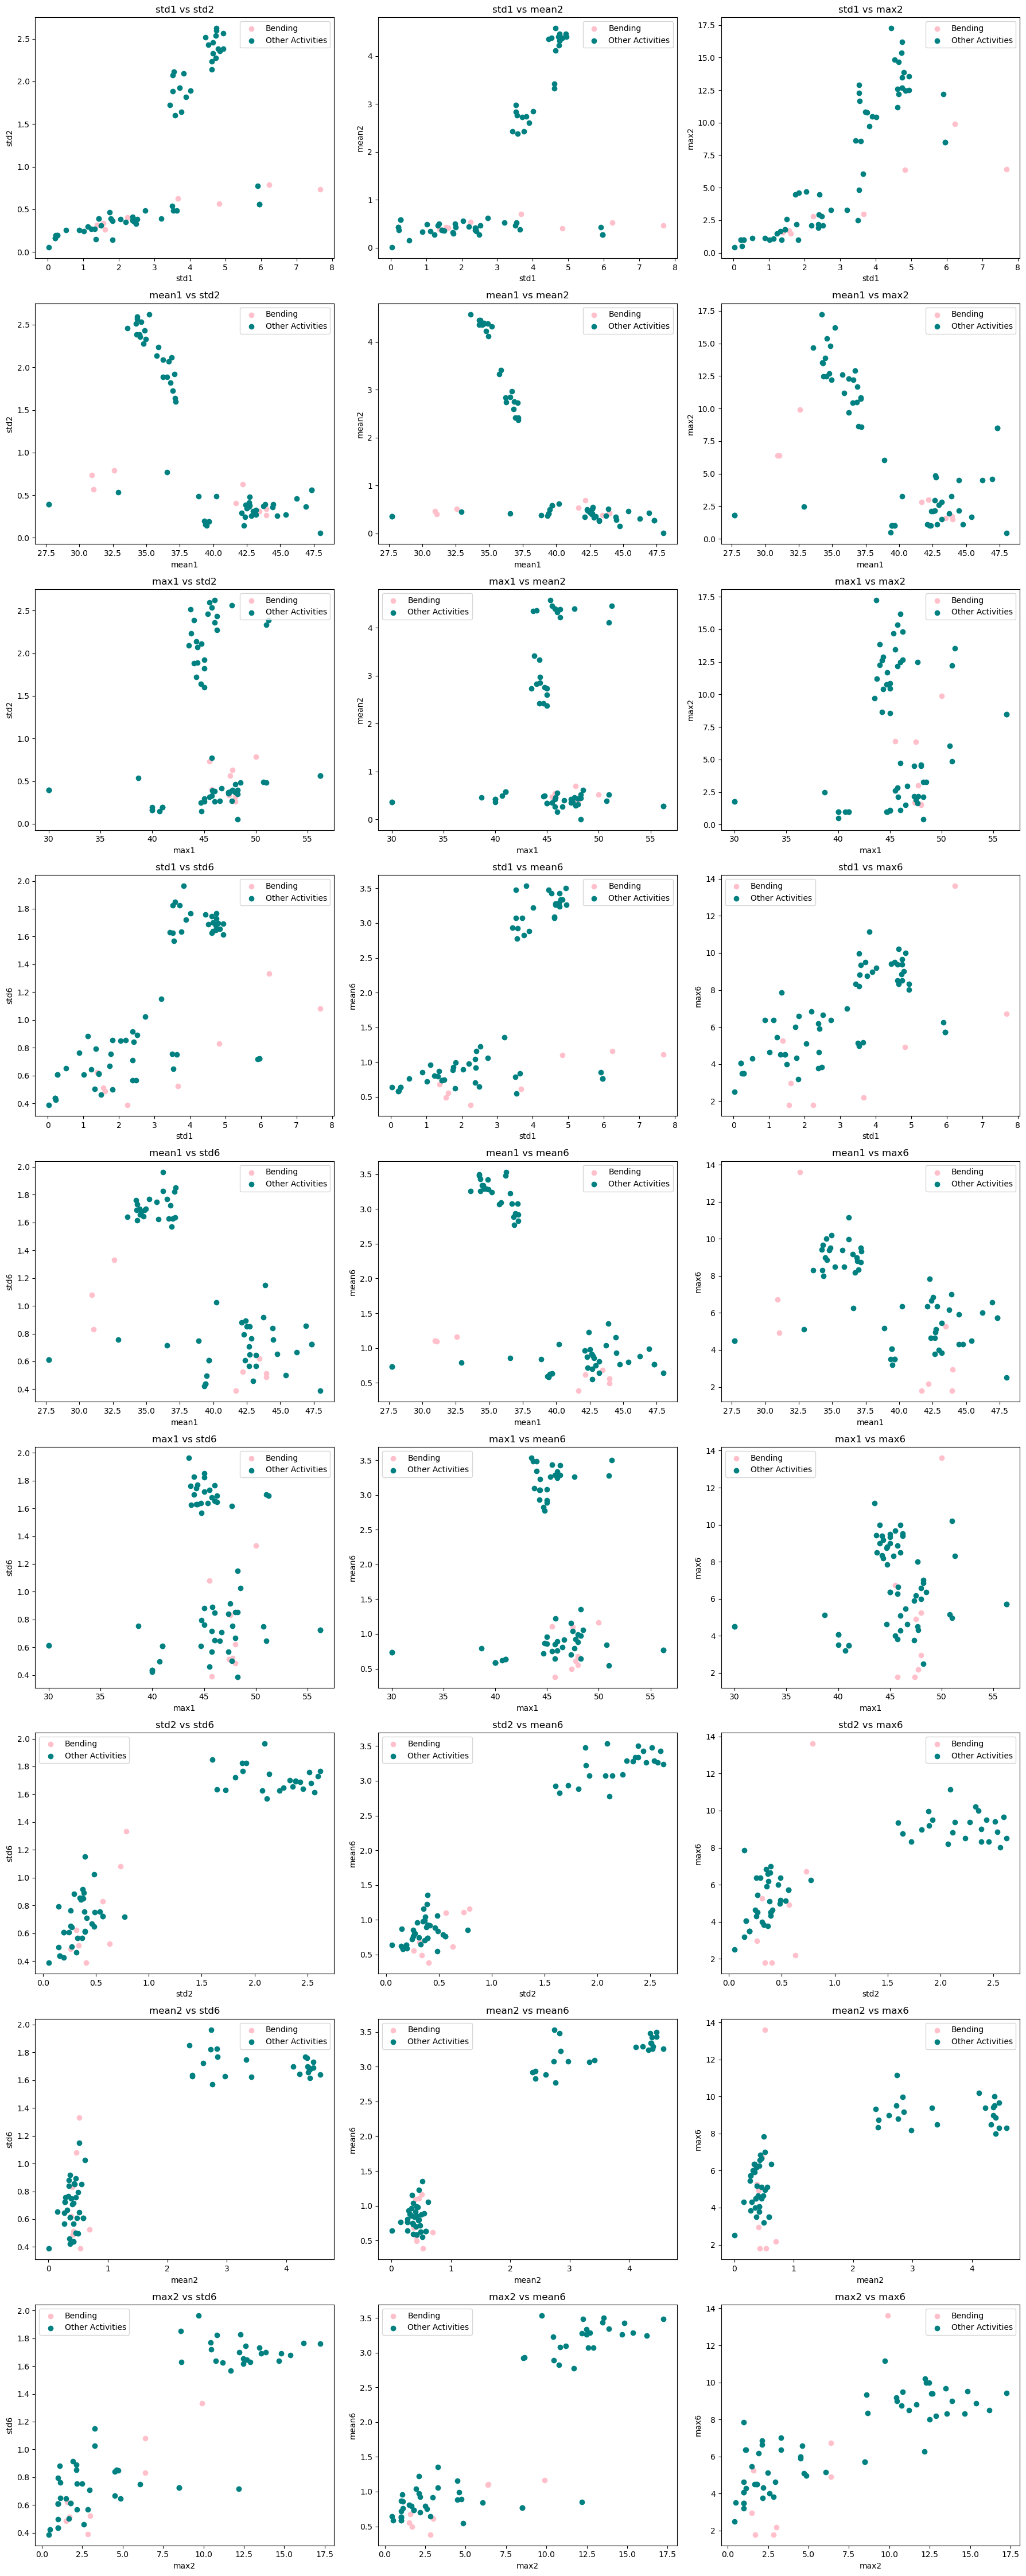

In [12]:
# import matplotlib.pyplot as plt

# # Create scatter plots for pairs of selected features
# plt.figure(figsize=(13, 4))

# # Plot std1 vs mean2
# plt.subplot(1, 3, 1)
# plt.scatter(
#     selected_dataframe[selected_dataframe['activity'].str.contains('bending')]['std1'],
#     selected_dataframe[selected_dataframe['activity'].str.contains('bending')]['mean2'],
#     color='pink', label='Bending'
# )
# plt.scatter(
#     selected_dataframe[~selected_dataframe['activity'].str.contains('bending')]['std1'],
#     selected_dataframe[~selected_dataframe['activity'].str.contains('bending')]['mean2'],
#     color='teal', label='Other Activities'
# )
# plt.xlabel('std1')
# plt.ylabel('mean2')
# plt.title('std1 vs mean2')
# plt.legend()

# plt.subplot(1, 3, 2)
# ##for bending
# plt.scatter(
#     selected_dataframe[selected_dataframe['activity'].str.contains('bending')]['std1'],
#     selected_dataframe[selected_dataframe['activity'].str.contains('bending')]['max6'],
#     color='pink', label='Bending'
# )
# ##for other activities
# plt.scatter(
#     selected_dataframe[~selected_dataframe['activity'].str.contains('bending')]['std1'],
#     selected_dataframe[~selected_dataframe['activity'].str.contains('bending')]['max6'],
#     color='teal', label='Other Activities'
# )
# plt.xlabel('std1')
# plt.ylabel('max6')
# plt.title('std1 vs max6')
# plt.legend()


# plt.subplot(1, 3, 3)
# ##for bending
# plt.scatter(
#     selected_dataframe[selected_dataframe['activity'].str.contains('bending')]['mean2'],
#     selected_dataframe[selected_dataframe['activity'].str.contains('bending')]['max6'],
#     color='pink', label='Bending'
# )
# ##for other activities
# plt.scatter(
#     selected_dataframe[~selected_dataframe['activity'].str.contains('bending')]['mean2'],
#     selected_dataframe[~selected_dataframe['activity'].str.contains('bending')]['max6'],
#     color='teal', label='Other Activities'
# )
# plt.xlabel('mean2')
# plt.ylabel('max6')
# plt.title('mean2 vs max6')
# plt.legend()

import matplotlib.pyplot as plt

feature_types = ['std', 'mean', 'max']
column_suffixes = [1, 2, 6]

# To Generate all unique pairs of features
feature_pairs = []
for i, col1 in enumerate(column_suffixes):
    for j, col2 in enumerate(column_suffixes):
         if i < j:  # Ensuring unique pairs (e.g., std1 vs mean2, not std1 vs std1)
            for ft1 in feature_types:
                for ft2 in feature_types:
                    feature_pairs.append((f'{ft1}{col1}', f'{ft2}{col2}'))


num_plots = len(feature_pairs)
num_cols = 3 
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

plt.figure(figsize=(6 * num_cols, 5 * num_rows))

# Plot each feature pair
for idx, (col1_name, col2_name) in enumerate(feature_pairs, start=1):
    plt.subplot(num_rows, num_cols, idx)

    # Plot data for bending and other activities
    plt.scatter(
        selected_dataframe[selected_dataframe['activity'].str.contains('bending')][col1_name],
        selected_dataframe[selected_dataframe['activity'].str.contains('bending')][col2_name],
        color='pink', label='Bending'
    )
    plt.scatter(
        selected_dataframe[~selected_dataframe['activity'].str.contains('bending')][col1_name],
        selected_dataframe[~selected_dataframe['activity'].str.contains('bending')][col2_name],
        color='teal', label='Other Activities'
    )

    # Set labels, title, and legend
    plt.xlabel(col1_name)
    plt.ylabel(col2_name)
    plt.title(f'{col1_name} vs {col2_name}')
    plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

#### ii. Splitted Plots

In [13]:
# split_segment = []
# for i, row in training_df.iterrows():
#     seg =[]
#     for i in range(1, 7):
#         time_series = row[[f'min{i}', f'max{i}', f'mean{i}', f'median{i}', f'std{i}', f'1st_quart{i}', f'3rd_quart{i}']]
        
#         ##Splitting Segments
#         mid = len(time_series) // 2
#         seg1=time_series[:mid]
#         seg2=time_series[mid:]
        
#         # Appending the segments
#         seg.extend([seg1, seg2])
#     split_segment.append(seg)

###My previous method was wrong so I was getting an error..after understanding the question properly I have divided all time domain features into 2 parts
##total=12

In [14]:
# Generate column names for the 12 time series
# adding_columns = []
# for i in range(1, 13):  # Now we have 12 time series
#     adding_columns.extend([f'mean{i}', f'max{i}', f'std{i}'])

# # Create the DataFrame
# split_dataset = pd.DataFrame(split_segment, columns=adding_columns)
# split_dataset['activity'] = split_activities  # Add the activity column

# # Verify the DataFrame
# print(split_dataset.head())



In [15]:
def extracting_time_features(time_data):
    features = {}
    for i, column in enumerate(time_data.columns[1:], start=1):
        series = pd.to_numeric(time_data[column], errors='coerce')
        series = series.dropna()
        if series.empty:
            continue

        # Split the time series into two parts
        split_point = len(series) // 2
        part1 = series[:split_point]  # First half
        part2 = series[split_point:]  # Second half

        # Computing features for part1
        features.update({
            f'max{i}': np.max(part1),
            f'mean{i}': np.mean(part1),
            f'std{i}': np.std(part1),
        })

        # Computing features for part2
        features.update({
            f'max{i+6}': np.max(part2),
            f'mean{i+6}': np.mean(part2),
            f'std{i+6}': np.std(part2),
        })

    return features


split_training_data = []

for path, activity in training_data:
    time_data = pd.read_csv(path, sep=',', skiprows=4, on_bad_lines='skip')
    features = extracting_time_features(time_data)  # Extract features for both parts
    features['activity'] = activity  # Add activity label
    split_training_data.append(features)


In [16]:
split_training_df = pd.DataFrame(split_training_data)

In [17]:
split_training_df

max1      mean1      std1   max7      mean7      std7   max2     mean2  \
0   46.50  44.057167  1.553724  47.40  43.851833  1.553920   1.50  0.381042   
1   47.75  43.278875  3.466111  46.00  41.080750  3.530103   3.00  0.673292   
2   45.75  41.621208  3.112140  43.67  41.734917  0.594677   2.83  0.623083   
3   48.00  44.117042  1.357000  46.50  42.792875  1.056584   1.30  0.250042   
4   45.00  43.486208  1.279302  48.00  44.452042  1.767557   1.30  0.378667   
..    ...        ...       ...    ...        ...       ...    ...       ...   
64  46.00  34.966250  4.723143  46.25  34.560417  4.742673  12.68  4.207958   
65  45.67  34.737042  4.267798  51.00  35.134583  4.978609  12.21  4.217333   
66  45.00  33.886458  5.133048  47.67  34.779625  4.704418  12.44  4.332208   
67  44.00  34.836458  4.858937  45.75  34.363292  4.578773  12.38  4.257750   
68  42.75  34.329333  4.540348  43.67  34.122417  4.329060  14.50  4.315917   

        std2   max8  ...  max11     mean11     std11  max6     mean6  \
0   0.328853   1.70  ...  38.25  34.883375  2.293899  1.79  0.598250   
1   0.632962   2.86  ...  38.50  30.965708  3.752276  1.53  0.640958   
2   0.488574   1.12  ...  36.00  29.635833  2.058345  1.79  0.419083   
3   0.313444   1.58  ...  26.00  22.850875  1.877797  5.26  0.815417   
4   0.283841   1.50  ...  26.00  21.882042  1.925470  2.28  0.524875   
..       ...    ...  ...    ...        ...       ...   ...       ...   
64  2.327077  12.09  ...  25.25  16.168167  3.318844  8.83  3.146333   
65  2.332883  11.41  ...  25.00  16.175167  3.141995  9.19  3.334125   
66  2.447995  12.48  ...  24.00  15.829625  3.381962  7.89  3.248417   
67  2.507393  15.37  ...  23.00  15.996875  2.876444  8.86  3.169625   
68  2.465114  17.24  ...  24.00  16.021917  2.961316  9.42  3.381250   

        std6  max12    mean12     std12  activity  
0   0.525558   1.50  0.388333  0.477530  bending1  
1   0.553385   2.18  0.586083  0.490847  bending1  
2   0.410342   1.50  0.347500  0.362386  bending1  
3   0.716518   4.06  0.543875  0.472458  bending1  
4   0.485832   2.96  0.585750  0.486900  bending1  
..       ...    ...       ...       ...       ...  
64  1.634801   9.39  3.430208  1.644542   walking  
65  1.733949  10.21  3.225917  1.661853   walking  
66  1.562292   8.01  3.274750  1.667109   walking  
67  1.644204   8.84  3.409458  1.703529   walking  
68  1.722091   9.12  3.577833  1.790371   walking  

[69 rows x 37 columns]

In [18]:
# selected_features = ['std1','mean1','max1','std2','mean2','max2','std3','mean3','max3','std4','mean4','max4','std5','mean5','max5','std6','mean6','max6','std7','mean7','max7','std8','mean8','max8','std9','mean9','max9','std10','mean10','max10','std11','mean11','max11','std12','mean12','max12']
# split_training_df= split_training_df[selected_features + ['activity']]

In [19]:
#split_dataset['activity'] = training_df['activity']

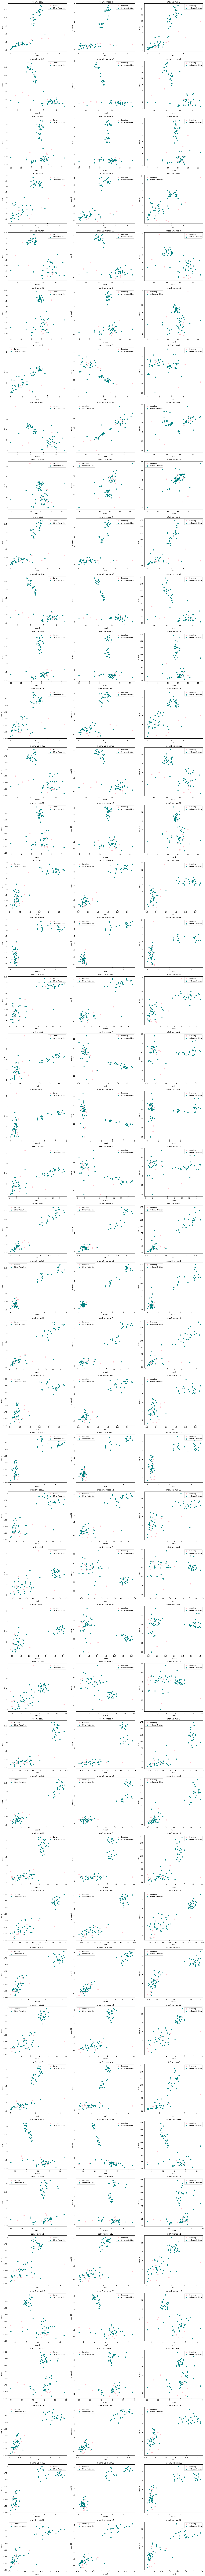

In [20]:
##Scaterplots for split Time Features
feature_types = ['std', 'mean', 'max']
column_suffixes = [1, 2, 6, 7, 8, 12]

# To Generate all unique pairs of features
feature_pairs = []
for i, col1 in enumerate(column_suffixes):
    for j, col2 in enumerate(column_suffixes):
         if i < j:  # Ensuring unique pairs (e.g., std1 vs mean2, not std1 vs std1)
            for ft1 in feature_types:
                for ft2 in feature_types:
                    feature_pairs.append((f'{ft1}{col1}', f'{ft2}{col2}'))


num_plots = len(feature_pairs)
num_cols = 3 
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

plt.figure(figsize=(6 * num_cols, 5 * num_rows))

# Plot each feature pair
for idx, (col1_name, col2_name) in enumerate(feature_pairs, start=1):
    plt.subplot(num_rows, num_cols, idx)

    # Ploting data for bending and other activities
    plt.scatter(
        split_training_df[split_training_df['activity'].str.contains('bending')][col1_name],
        split_training_df[split_training_df['activity'].str.contains('bending')][col2_name],
        color='pink', label='Bending'
    )
    plt.scatter(
        split_training_df[~split_training_df['activity'].str.contains('bending')][col1_name],
        split_training_df[~split_training_df['activity'].str.contains('bending')][col2_name],
        color='teal', label='Other Activities'
    )

    plt.xlabel(col1_name)
    plt.ylabel(col2_name)
    plt.title(f'{col1_name} vs {col2_name}')
    plt.legend()

##for better vizualization
plt.tight_layout()

# Show the plots
plt.show()

#### iii. Time Series Segments

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

def extracting_time_features(time_data, l):
    features = {}
    for i, column in enumerate(time_data.columns[1:], start=1):
        series = pd.to_numeric(time_data[column], errors='coerce')
        series = series.dropna()
        if series.empty:
            continue

        segment_length = len(series) // l
        for segment in range(1, l + 1):
            start = (segment - 1) * segment_length
            end = segment * segment_length if segment < l else len(series)
            segment_data = series[start:end]

            features.update({
                f'max{i}_segment{segment}': np.max(segment_data),
                f'mean{i}_segment{segment}': np.mean(segment_data),
                f'std{i}_segment{segment}': np.std(segment_data),
            })

    return features         

    return features
    
log_training_data = []

for path, activity in training_data:
        time_data = pd.read_csv(path, sep=',', skiprows=4, on_bad_lines='skip')
        log_training_data.append((time_data, activity))  

L=1, p=10, CV Accuracy: 0.9714
L=2, p=10, CV Accuracy: 0.9714
L=3, p=10, CV Accuracy: 0.9857
L=4, p=10, CV Accuracy: 0.9857
L=5, p=10, CV Accuracy: 0.9703
L=6, p=10, CV Accuracy: 0.9857
L=7, p=10, CV Accuracy: 0.9857
L=8, p=10, CV Accuracy: 0.9857
L=9, p=10, CV Accuracy: 0.9857
L=10, p=10, CV Accuracy: 0.9857
L=11, p=10, CV Accuracy: 0.9857
L=12, p=10, CV Accuracy: 0.9857
L=13, p=10, CV Accuracy: 0.9857
L=14, p=10, CV Accuracy: 0.9857
L=15, p=10, CV Accuracy: 0.9857
L=16, p=10, CV Accuracy: 0.9857
L=17, p=10, CV Accuracy: 0.9857
L=18, p=10, CV Accuracy: 0.9857
L=19, p=10, CV Accuracy: 0.9857
L=20, p=10, CV Accuracy: 0.9857

Best (L, p) pair: L=3, p=10
Best CV Accuracy: 0.9857
Selected Features: Index(['mean1_segment2', 'max2_segment1', 'max2_segment3', 'max3_segment1',
       'mean3_segment1', 'max5_segment1', 'mean5_segment1', 'max5_segment3',
       'mean5_segment3', 'max6_segment3'],
      dtype='object')


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

def extracting_time_features(time_data, l):
    features = {}
    for i, column in enumerate(time_data.columns[1:], start=1):
        series = pd.to_numeric(time_data[column], errors='coerce')
        series = series.dropna()
        if series.empty:
            continue

        segment_length = len(series) // l
        for segment in range(1, l + 1):
            start = (segment - 1) * segment_length
            end = segment * segment_length if segment < l else len(series)
            segment_data = series[start:end]

            features.update({
                f'max{i}_segment{segment}': np.max(segment_data),
                f'mean{i}_segment{segment}': np.mean(segment_data),
                f'std{i}_segment{segment}': np.std(segment_data),
            })

    return features         

    return features
    
log_training_data = []

for path, activity in training_data:
        time_data = pd.read_csv(path, sep=',', skiprows=4, on_bad_lines='skip')
        log_training_data.append((time_data, activity))  
results=[]
for L in range(1, 21):
    split_training_df = []

    # Process each instance in the training data
    for time_data, activity in log_training_data:
        features = extracting_time_features(time_data, L)  
        features['activity'] = activity  
        split_training_df.append(features)

    # Convert list to DataFrame
    split_training_df = pd.DataFrame(split_training_df)

    # Prepare data for logistic regression
    X = split_training_df.drop(columns=['activity'])  # Features
    y = split_training_df['activity'].apply(lambda x: 1 if 'bending' in x else 0)  # Binary labels (1 for bending, 0 for others)
    valid_rows = X.dropna().index
    X_clean = X.loc[valid_rows]
    y_clean = y.loc[valid_rows]
    # Split data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # valid_rows = X_train.dropna().index
    # X_train_clean = X_train.loc[valid_rows]
    # y_train_clean = y_train.loc[valid_rows]
    # Train logistic regression model
    # X_clean = sm.add_constant(X_clean)
    for feature in X_clean.columns:
        print(f"Feature: {feature}")
        print(pd.crosstab(X_clean[feature], y_clean))
    # Fit logistic regression model using statsmodels
    
    # X_train_sm = sm.add_constant(X_clean)
    # LR_model = sm.OLS(y_clean, X_train_sm).fit()

    # p_values=LR_model.pvalues[1:]  # Exclude the intercept
    # significant_features = p_values[p_values < 0.05].index
    
    # X_pruned = X_clean[significant_features]
    # sf=len(significant_features)
    #model = LogisticRegression(max_iter=1000)
    # model.fit(X_train_clean, y_train_clean)

    # # Predict on the test set
    # y_pred = model.predict(X_test)

    # # Evaluate the model
    # accuracy = accuracy_score(y_test, y_pred)
    # print(f"Accuracy for L={L}: {accuracy * 100:.2f}%")
#     model = LogisticRegression(max_iter=1000)
#     # if sf!=0:
#     rfe = RFE(model, n_features_to_select=10)
#     rfe.fit(X_clean, y_clean)

#     # Get selected features
#     selected_features = X_clean.columns[rfe.support_]
#     X_selected = X_clean[selected_features]

#     # 5-fold stratified cross-validation
#     skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     cv_scores = cross_val_score(model, X_selected, y_clean, cv=skf, scoring='accuracy')

#     # Store results
#     results.append({
#         'L': L,
#         'p': len(selected_features),
#         'cv_accuracy': np.mean(cv_scores),
#         'selected_features': selected_features
#     })

#     print(f"L={L}, p={len(selected_features)}, CV Accuracy: {np.mean(cv_scores):.4f}")

# # Find the best (L, p) pair
# best_result = max(results, key=lambda x: x['cv_accuracy'])
# print(f"\nBest (L, p) pair: L={best_result['L']}, p={best_result['p']}")
# print(f"Best CV Accuracy: {best_result['cv_accuracy']:.4f}")
# print(f"Selected Features: {best_result['selected_features']}")

# # Train final model with the best (L, p) pair
# final_model = LogisticRegression(max_iter=1000)
# final_model.fit(X_selected, y_clean)


Feature: max1_segment1
activity       0  1
max1_segment1      
30.00          2  0
38.67          1  0
40.00          3  0
40.67          1  0
41.00          2  0
43.50          1  0
43.67          1  0
43.75          1  0
44.00          2  0
44.25          2  0
44.33          2  0
44.67          2  0
44.75          2  0
45.00          5  0
45.33          1  0
45.50          2  1
45.75          3  1
45.80          1  0
46.00          4  0
46.25          2  0
46.50          1  0
46.67          1  0
47.33          2  0
47.40          0  1
47.50          1  1
47.67          2  0
47.75          1  1
48.00          2  2
48.25          3  0
48.50          1  0
50.00          0  1
50.75          1  0
51.00          2  0
51.25          1  0
56.25          2  0
Feature: mean1_segment1
activity        0  1
mean1_segment1      
27.716375       2  0
30.938104       0  1
31.058250       0  1
32.586208       0  1
32.905979       1  0
...            .. ..
45.399625       1  0
46.224938       1  0
46.

#### iv. Confusion Matrix

#### v. Test Classifier

#### vi. Separation

#### vii. Imbalance

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

#### ii. Comparison

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

#### ii. Naive Bayes

#### ii. Comparison

## 3. ISLR 4.8.3

## 4. ISLR 4.8.7

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9